In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from datetime import datetime 

In [ ]:
from hh_requests import *

vacancies_dict = {
    'bim-менеджер':None, 
    'архитектор':[13], 
    'инженер-конструктор':[13], 
    'инженер ПТО':[13], 
    'инженер ОВиК':[13], 
    'инженер ВК':[13], 
    'Главный инженер проекта':[13],
    'курьер': None
    }
current_date_time = datetime.now().strftime("%Y-%m-%d")
df = get_vacancies_df_from_dict(vacancies_dict, [1, 2])
df.to_excel(f'reports/excel/Вакансии_{current_date_time}.xlsx', index=False)

In [71]:
df = pd.read_excel('reports/excel/Вакансии_2025-10-06.xlsx')
df_old = pd.read_excel('reports/excel/Вакансии_2025-05-07.xlsx')

In [72]:
concat_df = pd.concat([df, df_old], ignore_index=True)
concat_df

,Запрос,Дата,Вакансия,Город,Компания,Ссылка,ЗП,Валюта,Требования,Обязанности
0,bim-менеджер,2025-10-06,Архитектор,Санкт-Петербург,Инпроект,https://hh.ru/vacancy/126168046,130000,RUR,При желании — участие в авторском надзоре. Нам...,Участие в подготовке проектной документации (С...
1,bim-менеджер,2025-10-06,BIM - менеджер,Москва,СЗ Центр-Инвест,https://hh.ru/vacancy/125265524,350000,RUR,Высшее техническое. Опыт работы в аналогичной ...,Формирование BIM-стандартов и регламентов и ко...
2,bim-менеджер,2025-10-06,Главный специалист по информационному моделиро...,Москва,Росжелдорпроект,https://hh.ru/vacancy/125901407,239000,RUR,Наличие высшего профессионального образования ...,Осуществлять методическое и технологическое со...
3,bim-менеджер,2025-10-06,BIM менеджер (координатор),Москва,Проект 31937,https://hh.ru/vacancy/125609486,300000,RUR,Уверенные подтверждённые знания <highlighttext...,Уверенная координация в BIM проекте (создание ...
4,bim-менеджер,2025-10-06,BIM-Менеджер / Главный специалист отдела техно...,Санкт-Петербург,Сэтл Строй,https://hh.ru/vacancy/126006458,184000,RUR,"Высшее образование, желательно ПГС, архитектур...",Осуществления контроля разработки проектов в к...
...,...,...,...,...,...,...,...,...,...,...
9798,курьер,2025-05-07,Курьер для Банка,Санкт-Петербург,Фаст Ривер,https://hh.ru/vacancy/115777829,130000,RUR,Готовность к разъездному характеру работы. Гра...,Выезжать на встречи к клиентам согласно маршру...
9799,курьер,2025-05-07,Курьер-партнёр для Самоката,Москва,СТАФФ МЕНЕДЖМЕНТ ГРУПП,https://hh.ru/vacancy/116452985,150000,RUR,Навык быстрой ориентации на местности или умен...,Доставка товаров (продукты) до покупателя в ус...
9800,курьер,2025-05-07,"Курьер на велосипеде (Москва, пр-т Зеленый, д....",Москва,ВкусВилл,https://hh.ru/vacancy/117234028,120000,RUR,Стильная брендированная форма по желанию. Умен...,Полное отсутствие штрафов и депремирования. До...
9801,курьер,2025-05-07,Водитель-курьер с личным автомобилем (м. Войко...,Москва,"Тануки, японский ресторан",https://hh.ru/vacancy/119087788,6000,RUR,Ищем вежливых и пунктуальных Водителей на личн...,NaN


In [104]:
df_count_all = concat_df[
    ((concat_df['Город']=='Санкт-Петербург') | (concat_df['Город']=='Москва'))
    ]

df_selary = df_count_all[
        (
            (df_count_all['ЗП']!=0) &
            (df_count_all['ЗП']<500000)
        )
    ]

df_selary_all = df_selary.copy()
df_selary_all['ЗП'] = df_selary['ЗП']/1000

pivot_mean_salary_all = df_selary_all.pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='mean'
    ).round(1).sort_values('2025-10-06').fillna(0)


pivot_mean_salary_spb = df_selary_all[df_selary_all['Город']=='Санкт-Петербург'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='mean'
    ).round(1).sort_values('2025-10-06').fillna(0)

pivot_mean_salary_msk = df_selary_all[df_selary_all['Город']=='Москва'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='mean'
    ).round(1).sort_values('2025-10-06').fillna(0)

pivot_count_all = df_count_all.pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='count'
    ).round(1)

pivot_count_spb = df_count_all[df_count_all['Город']=='Санкт-Петербург'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='count'
    ).round(1)

pivot_count_msk = df_count_all[df_count_all['Город']=='Москва'].pivot_table(
    index='Запрос', 
    columns=['Дата'], 
    values="ЗП",
    aggfunc='count'
    ).round(1)

pivot_diff = pivot_mean_salary_all.copy()
pivot_diff['Разница %'] = round((pivot_diff['2025-10-06'] - pivot_diff['2025-05-07'])/pivot_diff['2025-10-06']*100, 1)
display(pivot_diff['Разница %'])

Запрос
курьер                     3.0
инженер ПТО                5.5
инженер-конструктор        3.4
инженер ВК                 5.2
инженер ОВиК               1.4
архитектор                 3.5
bim-менеджер               2.7
Главный инженер проекта    2.2
Name: Разница %, dtype: float64

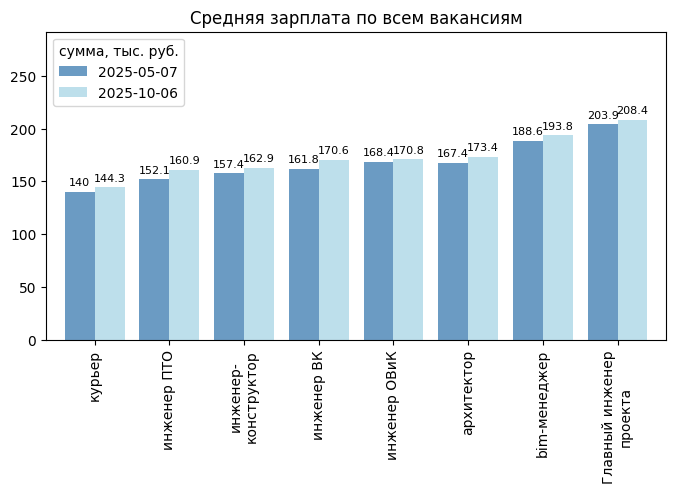

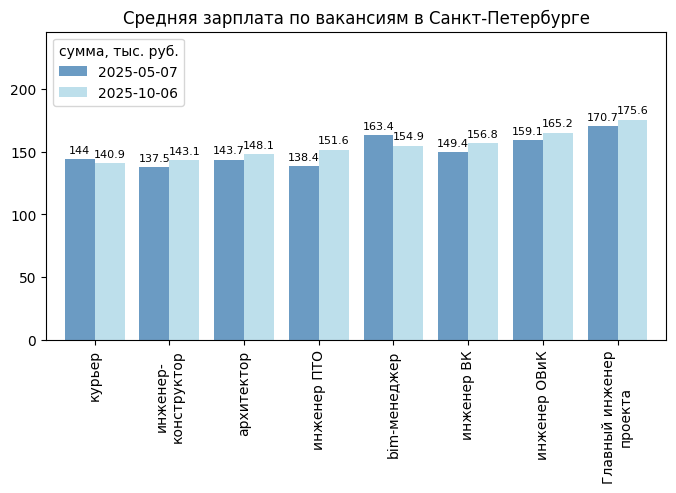

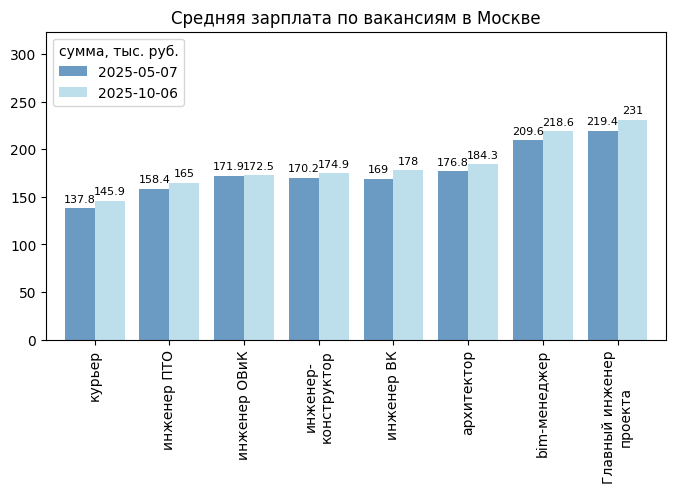

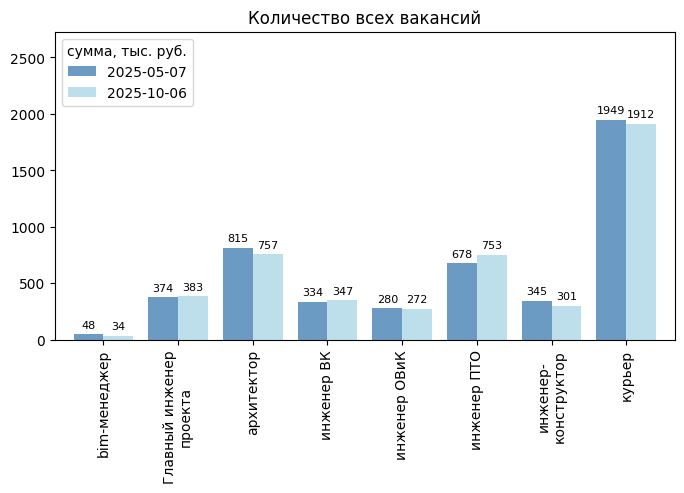

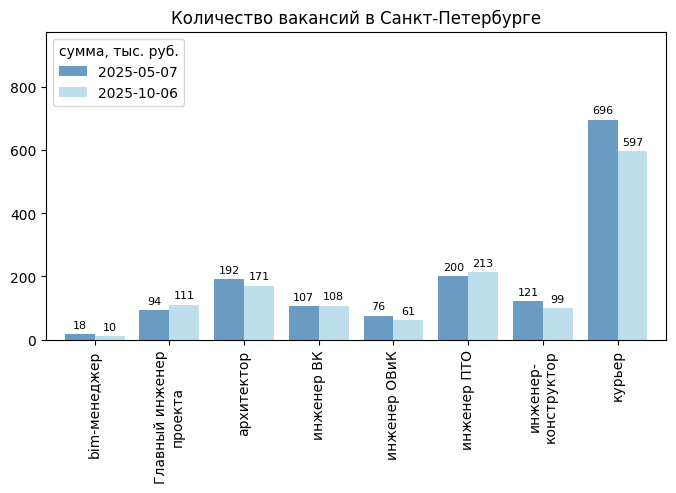

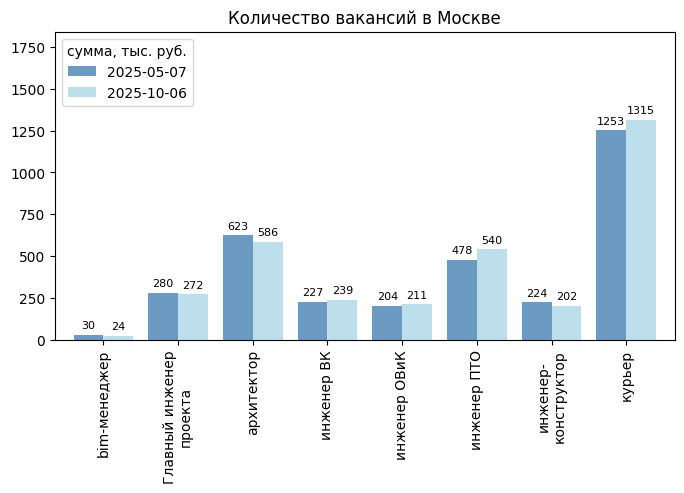

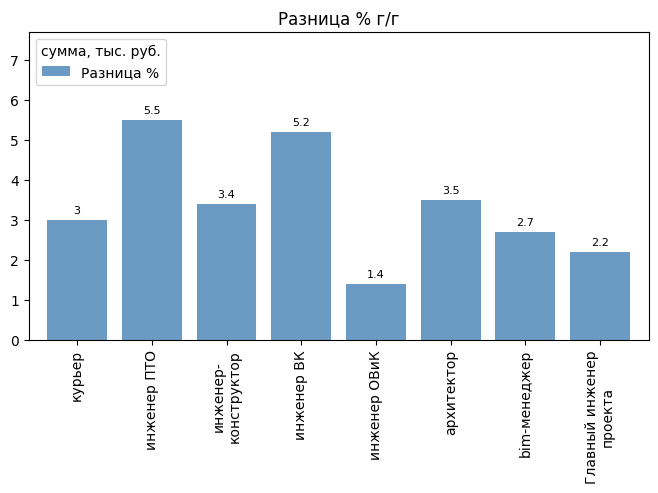

In [107]:
def plot_bar(df, title:str = '', color = ['steelblue', 'lightblue']):
    ax1 = df.plot(
    kind='bar', 
    color=color, 
    width=0.8, 
    alpha=0.8, 
    figsize=(8, 4),
    fontsize=10
    )
    for container in ax1.containers:
        ax1.bar_label(container, label_type='edge', padding=3, fontsize = 8)

    ax1.legend(title='сумма, тыс. руб.', loc='upper left')
    max_qty = df.values.max()
    ax1.set_ylim(0, max_qty * 1.4)  # +25% сверху
    max_sum = pivot_count_all.values.max()
    plt.title(title)
    labels = [item.get_text() for item in ax1.get_xticklabels()]
    max_width = 15
    wrapped_labels = ['\n'.join(textwrap.wrap(label, width=max_width)) for label in labels]
    ax1.set_xticklabels(wrapped_labels, rotation=90, ha='center')
    ax1.grid(False)
    ax1.set_xlabel(None)
    plt.show()

plot_bar(pivot_mean_salary_all, 'Средняя зарплата по всем вакансиям')
plot_bar(pivot_mean_salary_spb, 'Средняя зарплата по вакансиям в Санкт-Петербурге')
plot_bar(pivot_mean_salary_msk, 'Средняя зарплата по вакансиям в Москве')
plot_bar(pivot_count_all, 'Количество всех вакансий')
plot_bar(pivot_count_spb, 'Количество вакансий в Санкт-Петербурге')
plot_bar(pivot_count_msk, 'Количество вакансий в Москве')
plot_bar(pivot_diff['Разница %'], r'Разница % г/г', color = 'steelblue')



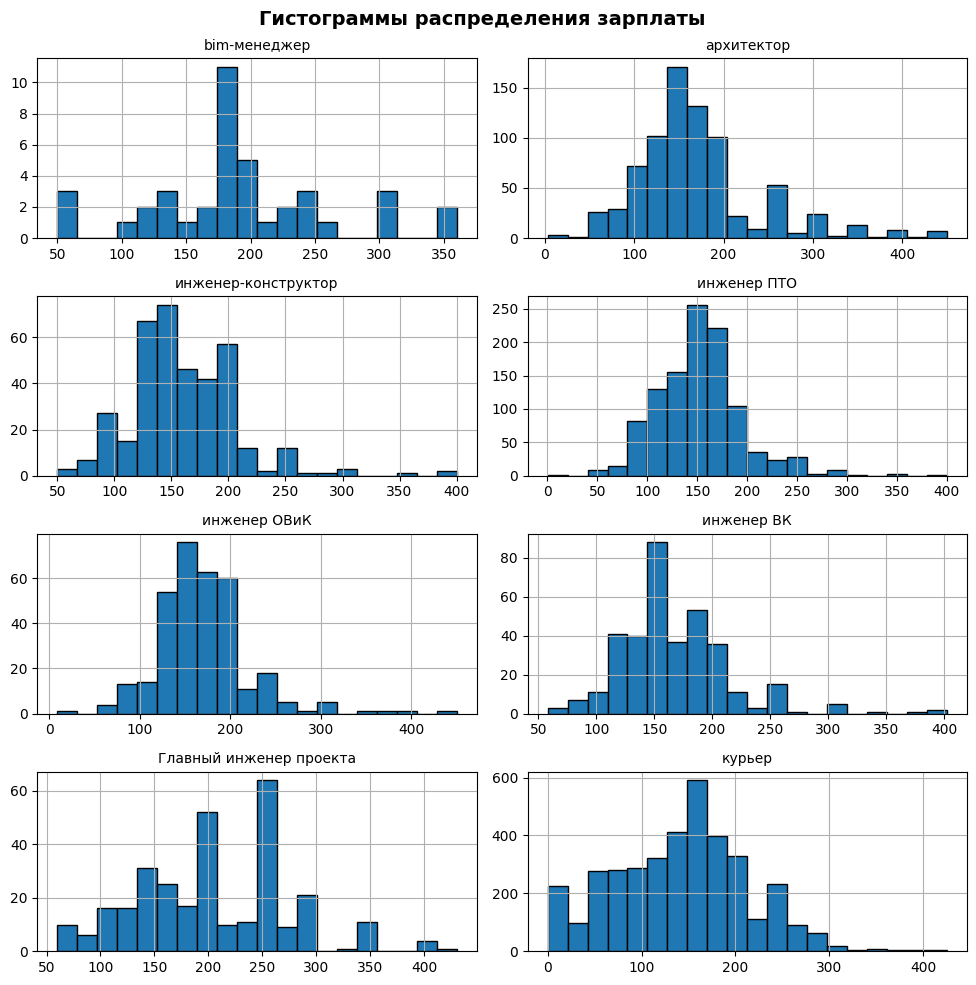

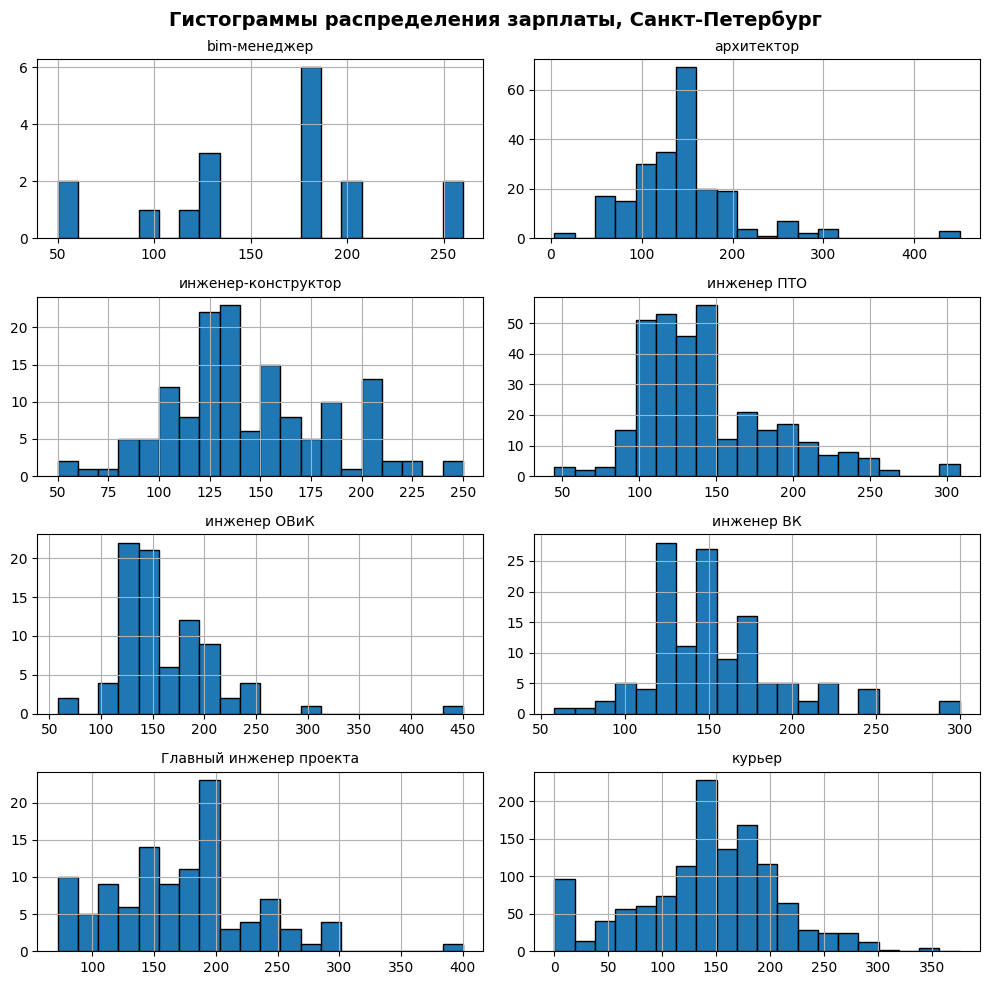

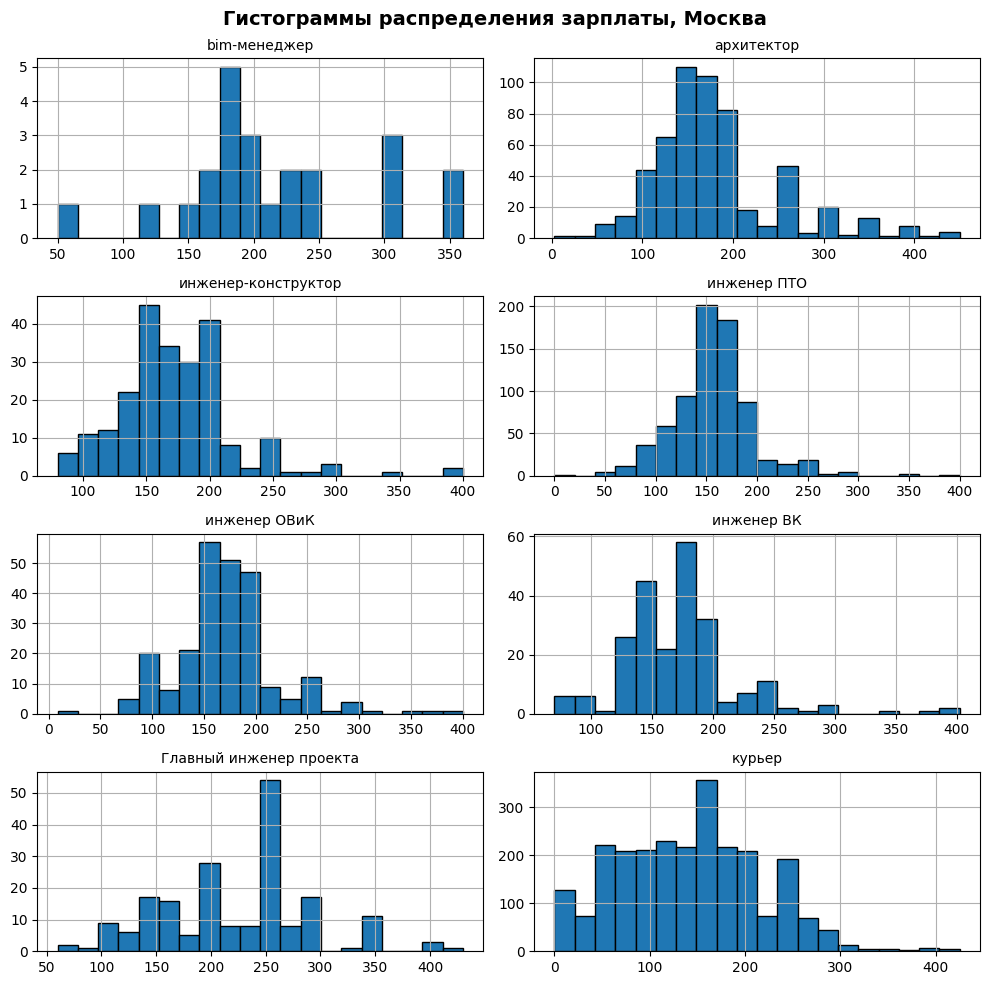

In [88]:
def plot_subhist(df, title = 'Гистограммы распределения зарплаты'):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
    fig.suptitle(title, fontsize=14, fontweight='bold')
    axes = axes.flatten()
    plot_idx = 0
    for vacancy in df['Запрос'].unique():
        df_: pd.DataFrame= df[df['Запрос'] == vacancy]
        df_.hist(ax = axes[plot_idx], column='ЗП', bins=20, figsize=(10, 5), edgecolor='black')
        axes[plot_idx].set_title(vacancy, fontsize=10)
        plot_idx+=1
    plt.tight_layout(rect=(0, 0, 1, 1))
plot_subhist(df_selary_all)
plot_subhist(df_selary_all[df_selary_all['Город']=='Санкт-Петербург'], 'Гистограммы распределения зарплаты, Санкт-Петербург')
plot_subhist(df_selary_all[df_selary_all['Город']=='Москва'], 'Гистограммы распределения зарплаты, Москва')
    